# Models for Population Dynamics

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

# P1
The spruce budworm is one of the most damaging native insects affecting spruces and true fir in [Canada](http://www.nrcan.gc.ca/forests/fire-insects-disturbances/top-insects/13383). A model for the budworm population dynamics is given by the following differential equation: [Ludwig et al. (1978)](http://www.jstor.org/stable/3939?seq=1#page_scan_tab_contents)

<img src="eq1.png" width="240">

In which, `r_B` and `K_B` represent the growth rate and carrying capacity respectively, and `A` and `B` are positive constansts.

    1 - Using odeint function (already imported at the top of this notebook), numerically solve this differential equation using a time interval of  0 < t < 100, with dt = 0.1 (i.e. ts= 0,0.1, 0.2 ...) 
    2 - Plot the values of N for N0= 1000, r_B = 0.1, K_B = 500, A = 50 and the following values for B: B = 0, 20 and 60
    3 - What is the effect of increasing B?

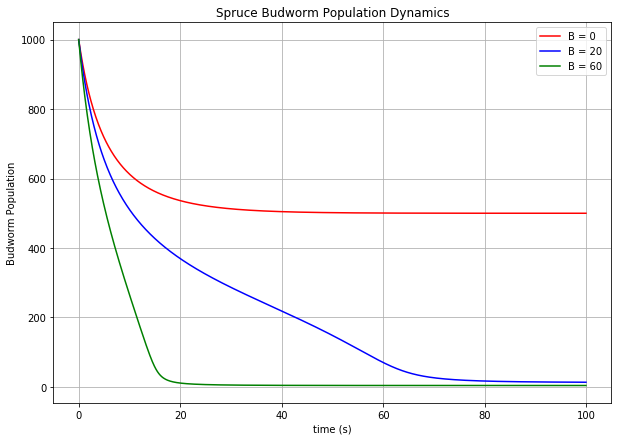

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

def dN_dt(N, t, r, K, A, B):
    dN = ((r*N)*(1-(N/K)))-((B*(N**2))/(A**2 + N**2))
    return dN

ts = np.arange(0, 100, 0.1)
N0 = 1000
r_B = 0.1
K_B = 500
A = 50
B=0

Ns = odeint(dN_dt, N0, ts, (r_B, K_B, A, B))
Ns1 = odeint(dN_dt, N0, ts, (r_B, K_B, A, 20))
Ns2 = odeint(dN_dt, N0, ts, (r_B, K_B, A, 60))

plt.figure(figsize=(10,7))
plt.plot(ts,Ns,'r-',label='B = 0')
plt.plot(ts,Ns1,'b-',label='B = 20')
plt.plot(ts,Ns2,'g-',label='B = 60')

plt.xlabel('time (s)')
plt.ylabel('Budworm Population')
plt.title('Spruce Budworm Population Dynamics')
plt.legend()
plt.grid()
plt.show()

# P2
A discrete-time predator-prey model can be described by the following system of difference equations:
       
<img src="eq2.png" width = "150">


In which `x_{k+1}, y_{k+1}` denote the prey and predator population at generation `k+1` respectively, and `a,b,c` and `d` are positive constants.

    1 - Write a recursive function that given initial values, x0 and y0, constants a,b,c,d and a specified number of 
        generations n, returns the population size at the nth generation.
    2 - Use your function to calculate the populations sizes for the values specified below, up to 100th generation: 
        a = 1.06, b = 0.007, c= 0.85, d= 0.003, x0=100 and y0=10 and store the values for each Xn and Yn in an array (i.e. 
        X=[x0,x1,...,xn],Y=[y0,y1,...,xn])
    3 - Plot X vs Y. What is the predator population size when prey population is at 80?
    4 - Plot values of X and Y vs number of generations
    5 - Plot the combined population size (prey and predator) vs number of generations.


When the prey population is at 80 the predator population is at: 
[ 1.45454545]
[ 20.38383838]
[ 30.5]


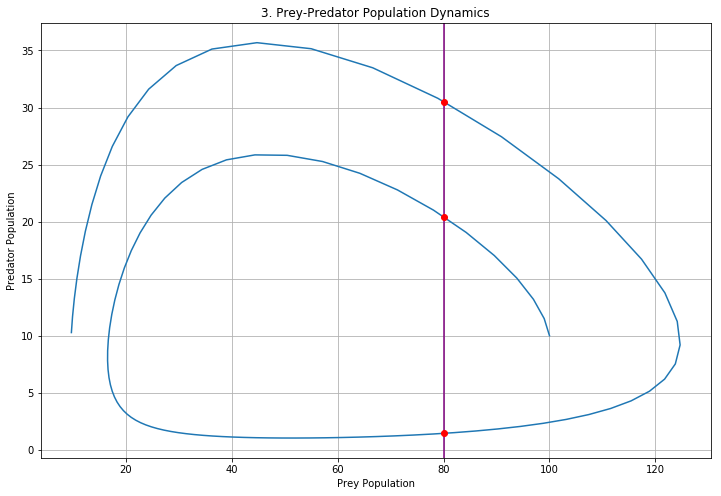

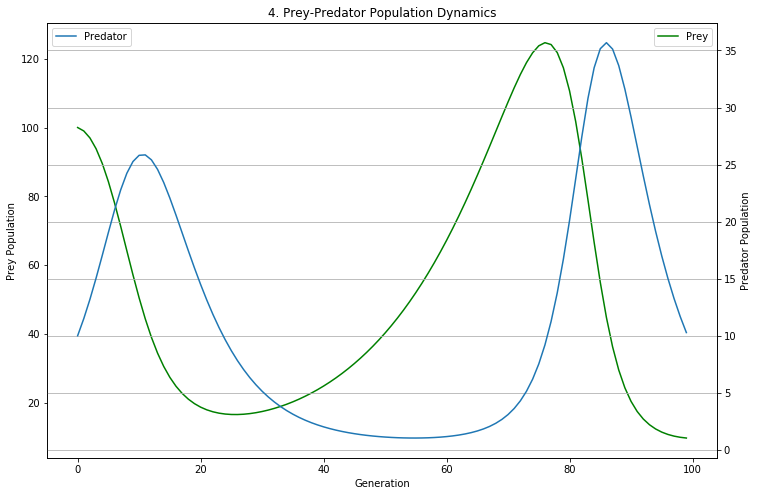

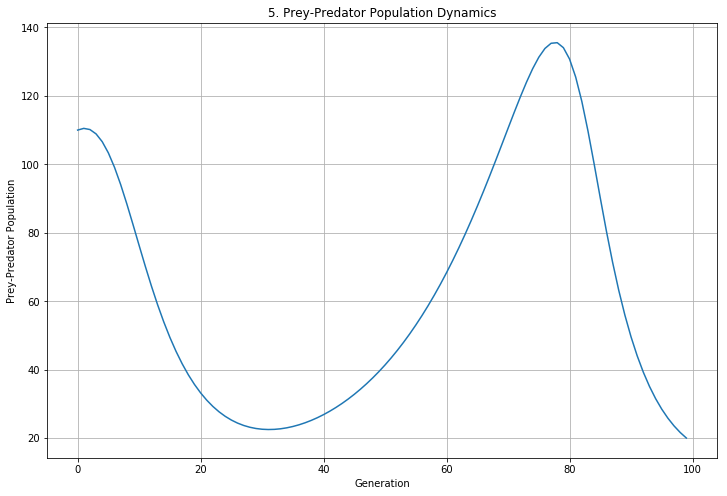

In [4]:
listX = []
listY = []

def predator_prey(x0,y0,a,b,c,d,n,listX,listY):
    if (n==0):
        return x0+y0
    n=n-1
    listX.append(x0)
    listY.append(y0)
    newX = (a*x0)-(b*x0*y0)
    newY = (c*y0)+(d*x0*y0)
    return predator_prey(newX,newY,a,b,c,d,n,listX,listY)

x0=100
y0=10
a=1.06
b=0.007
c=0.85
d=0.003
n=100

import matplotlib.pyplot as plt
import numpy as np

predator_prey(x0,y0,a,b,c,d,n,listX,listY)
x1 = np.array(listX)
y1 = np.array(listY)
z = x1+y1
gen = range(100)
x2 = [80]*36
y2 = range(36)

plt.figure(figsize=(12,8))
plt.plot(x1,y1)
plt.axvline(x=80,color='purple')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('3. Prey-Predator Population Dynamics')

print('When the prey population is at 80 the predator population is at: ')
x3 = np.linspace(78.109269364945888, 82.036231048338777, 100)
y1_new = np.linspace(1.3892524896388634, 1.506405106980405, 100)
y2_new = np.linspace(0, 3, 100)

idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.01)).reshape(-1)
plt.plot(x3[idx], y2_new[idx], 'ro')
print(y2_new[idx])

x3 = np.linspace(84.277270343010173, 78.095422659056311, 100)
y1_new = np.linspace(19.050186297128217, 21.00915145450233, 100)
y2_new = np.linspace(17, 22, 100)

idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.01)).reshape(-1)
plt.plot(x3[idx], y2_new[idx], 'ro')
print(y2_new[idx])

x3 = np.linspace(90.931761779686397, 78.921542457231624, 100)
y1_new = np.linspace(27.439924946221417, 30.809418359675046, 100)
y2_new = np.linspace(25.5, 31, 100)

idx = np.argwhere(np.isclose(y1_new, y2_new, atol=0.01)).reshape(-1)
plt.plot(x3[idx], y2_new[idx], 'ro')
print(y2_new[idx])

plt.grid()
plt.show()

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111)

ax.plot(gen,x1,color='green',label='Prey')
ax.set_xlabel('Generation')
ax.set_ylabel('Prey Population')

ax2 = ax.twinx()
ax2.plot(gen,y1,label='Predator')
ax2.set_ylabel('Predator Population')
ax.set_title('4. Prey-Predator Population Dynamics')
ax.legend(loc=1)
ax2.legend(loc=2)
plt.grid()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(gen,z)
plt.xlabel('Generation')
plt.ylabel('Prey-Predator Population')
plt.title('5. Prey-Predator Population Dynamics')
plt.grid()
plt.show()